# Graphing MusicNet Data

> [MusicNet](https://homes.cs.washington.edu/~thickstn/musicnet.html) is a collection of 330 freely-licensed classical music recordings, together with over 1 million annotated labels indicating the precise time of each note in every recording, the instrument that plays each note, and the note's position in the metrical structure of the composition.

MusicNet provides two datasets: the first is its metadata, which contains summary info of the tracks, and the second is the raw data (provided in different formats), which contains everything including the labels, and which takes much longer to download. I start by plotting MusicNet's metadata.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'text.color': '#ffffff',
    'lines.linewidth': 1,
    'lines.solid_capstyle': 'butt',
    'legend.fancybox': True,
    'axes.prop_cycle': cycler('color', ['#EC407A','#BBDEFB','#00E676','#90CAF9','#64B5F6','#42A5F5','#2196F3','#1DE9B6']),
    'axes.facecolor': '#222222',
    'axes.labelsize': 'large',
    'axes.labelcolor': 'white',
    'axes.axisbelow': True,
    'axes.grid': False,
    'axes.edgecolor': '222222',
    'axes.linewidth': 3.0,
    'axes.titlesize': 'x-large',
    'patch.edgecolor': '#222222',
    'patch.linewidth': 0.5,
    'svg.fonttype': 'path',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
    'grid.color': '#cbcbcb',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'xtick.color': '#ffffff',
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'ytick.color': '#ffffff',
    'font.size': 10.0,
    'savefig.edgecolor': '#222222',
    'savefig.facecolor': '#222222',
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.07,
    'figure.facecolor': '#222222',
    'ps.fonttype' : 42,
    'pdf.fonttype' : 42
})

In [3]:
# Open up the metadata
df = pd.read_csv('musicnet_metadata.csv')
df.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


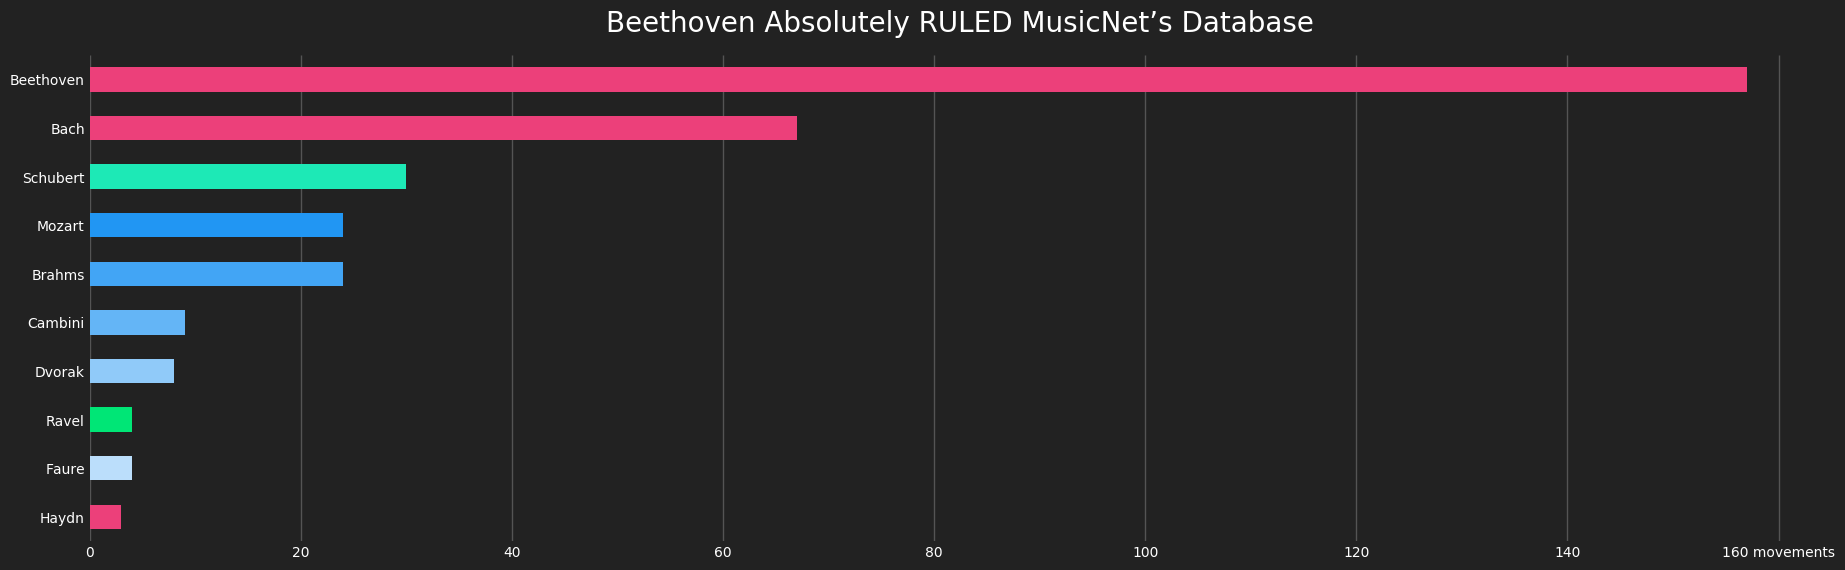

In [13]:
# Take a look at the composers (how many movements each composer holds in this database)
ax = df.composer.value_counts().sort_values().plot(kind='barh', legend=False, figsize=(20,6))
ax.set_title('Beethoven Absolutely RULED MusicNet’s Database',pad=17)
ax.title.set_fontsize(20)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,20,40,60,80,100,120,140,160])
ax.set_xticklabels([0,20,40,60,80,100,120,140,'160 movements'])
ax.tick_params(which='major',left=False, bottom=False, grid_alpha=0.3)
ax.grid(True, axis='x')
ax.set_axisbelow(True)

plt.show()

Seems like this dataset is pretty biased toward Beethoven.

But wait, that could be because we counted the movements rather than compositions per composer. Maybe things will look less crazy if we counted compositions instead?

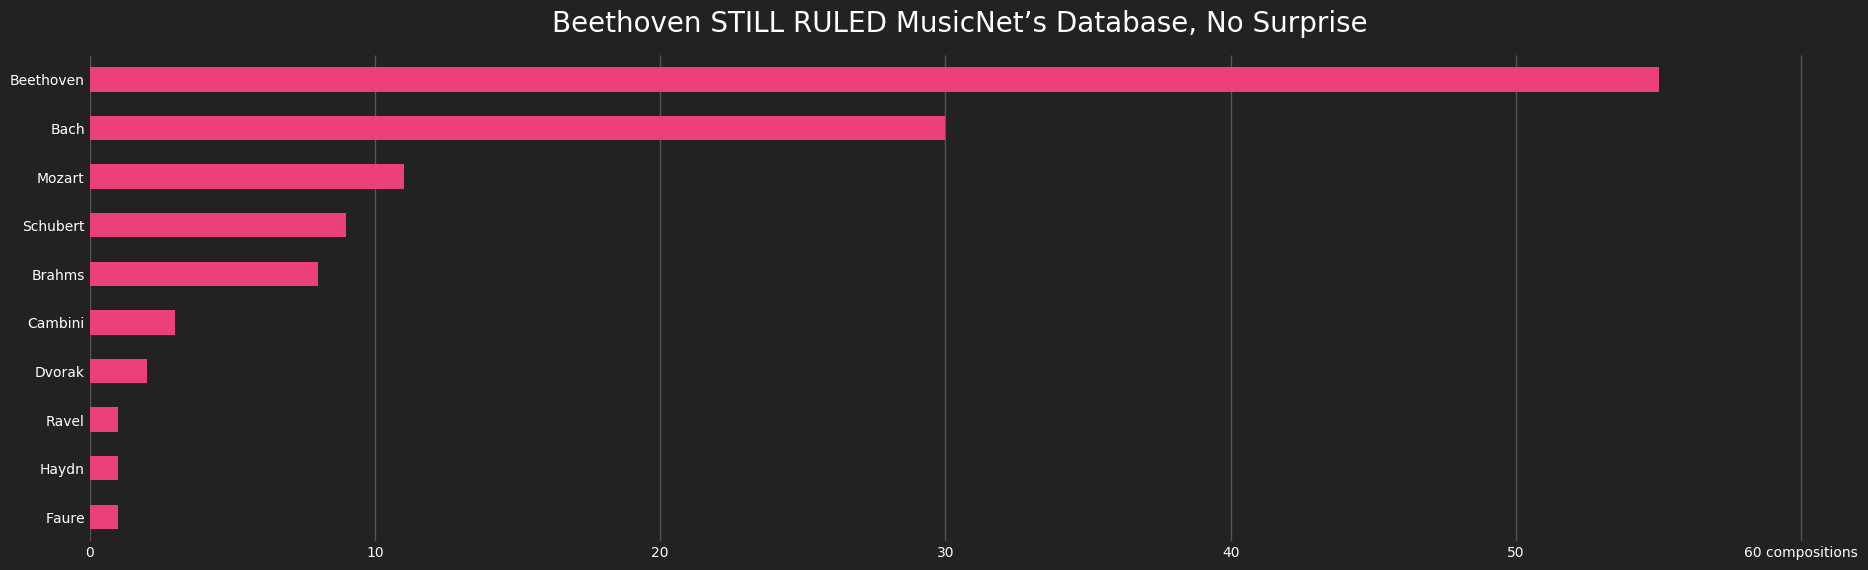

In [15]:
# Look at how many compositions each composer has
df1 = df.groupby('composition').composer.value_counts()
from collections import Counter
counter = Counter([composer[1] for composer in df1.keys()])
df1 = pd.DataFrame(counter, index=counter.keys()).transpose()['Beethoven']

ax = df1.sort_values().plot(kind='barh', color='#EC407A', legend=False, figsize=(20,6))
ax.set_title('Beethoven STILL RULED MusicNet’s Database, No Surprise',pad=17)
ax.title.set_fontsize(20)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels([0,10,20,30,40,50,'60 compositions'])
ax.set_xlim(0,61)
ax.tick_params(which='major',left=False, bottom=False, grid_alpha=0.3)
ax.grid(True, axis='x')
ax.set_axisbelow(True)

plt.show()

Apparently not.

What is the most popular tonality according to MusicNet? What does the breakdown look like for each composer?

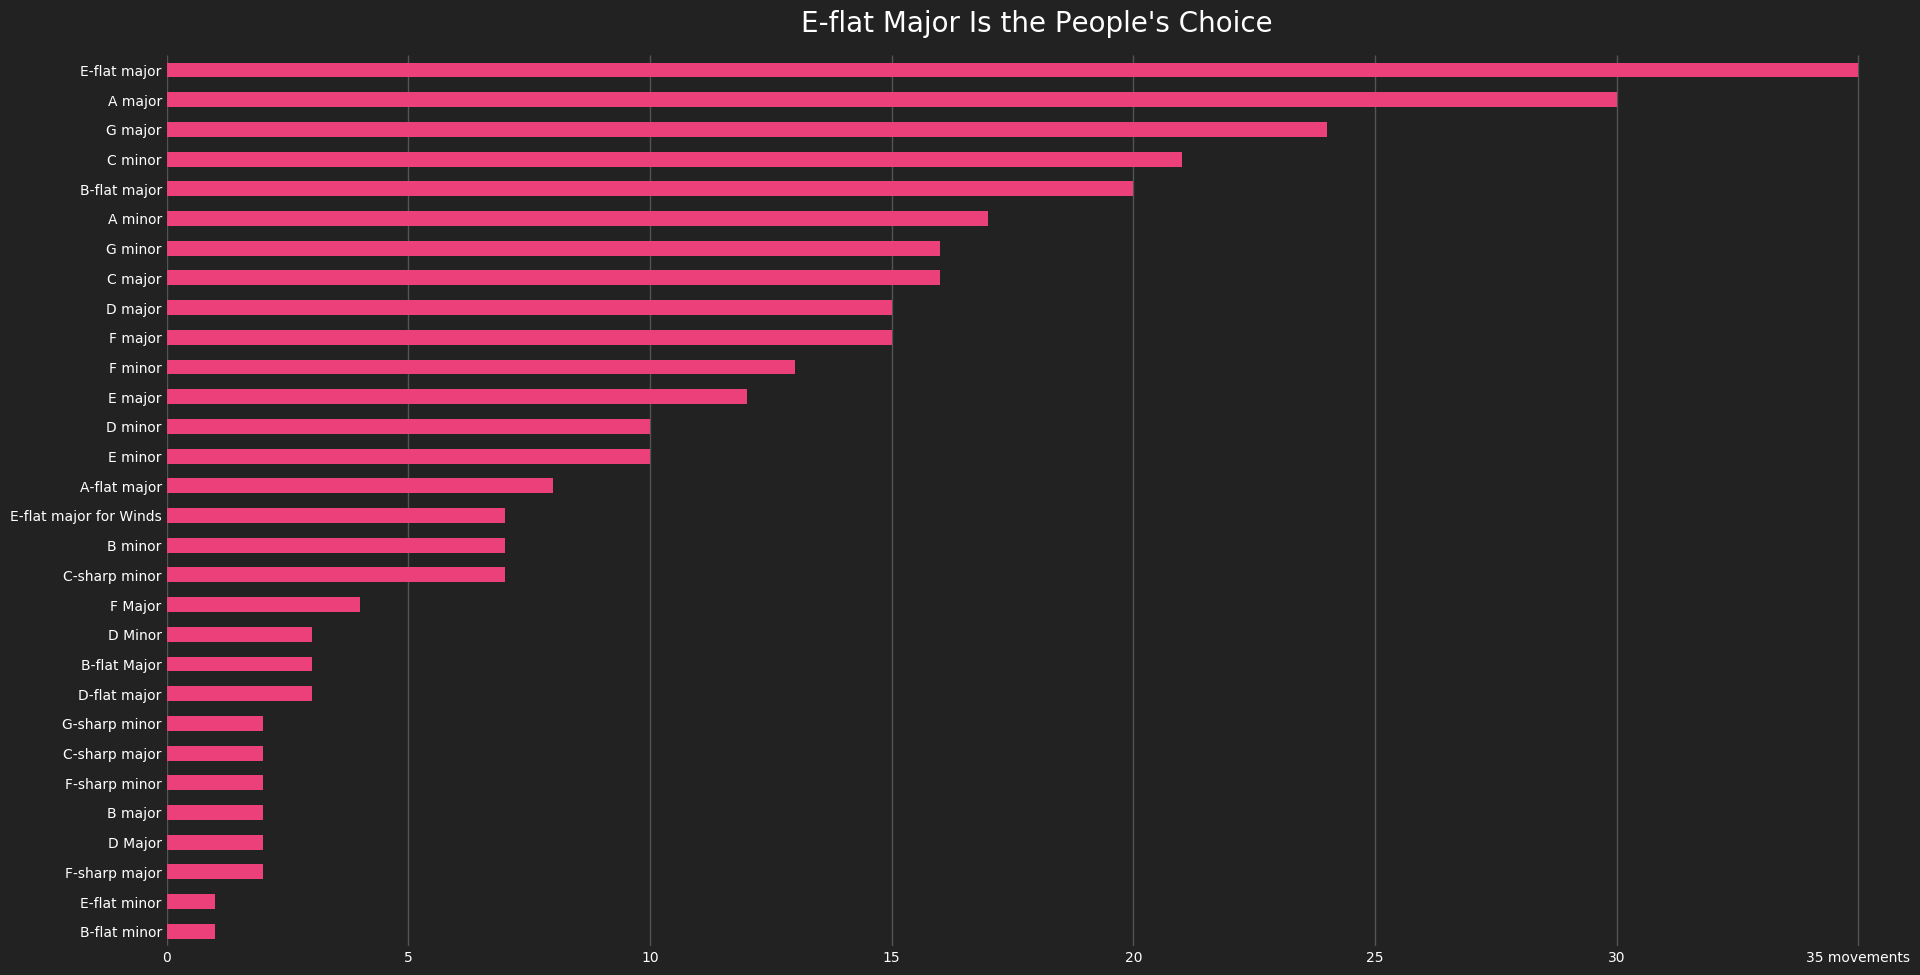

In [17]:
# Use regex to extract all tonalities
df['tonality'] = df.composition.str.extract('in ([A-Z][^\w].*)$', expand=True)

ax = df['tonality'].value_counts().sort_values().plot(kind='barh', color='#EC407A', legend=False, figsize=(20,11))
ax.set_title('E-flat Major Is the People\'s Choice', pad=17)
ax.title.set_fontsize(20)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,5,10,15,20,25,30,35])
ax.set_xticklabels([0,5,10,15,20,25,30,'35 movements'])
ax.set_xlim(0,36)
ax.tick_params(which='major',left=False, bottom=False, grid_alpha=0.3)
ax.grid(True, axis='x')
ax.set_axisbelow(True)

plt.show()

In [7]:
# df['tonality'] = df.tonality.replace('.*Major','major')
# df['tonality'] = df.tonality.replace('.*Minor','minor')
# df['tonality'] = df.composition.str.extract('in [A-Z][^\w]*(.{5})$', expand=True)
# df['tonality'].value_counts()

In [8]:
[(row[1].str.extract('in ([A-Z][^\w].*)$', expand=True)) for row in df.groupby('composer').composition]

[                 0
 106        E major
 107        E major
 108  F-sharp major
 109  C-sharp major
 110  C-sharp major
 111   B-flat minor
 112        G minor
 113        G minor
 114        A minor
 115        A minor
 116        A minor
 117        E minor
 118        E minor
 119  C-sharp minor
 120  C-sharp minor
 121        F minor
 122        F minor
 123        C minor
 124        C minor
 125        C major
 126            NaN
 127            NaN
 128            NaN
 129            NaN
 130            NaN
 131            NaN
 132   E-flat major
 133   E-flat major
 134        D minor
 135        D minor
 ..             ...
 143   A-flat major
 144   A-flat major
 145        G minor
 146        G minor
 147        G minor
 148        G minor
 149        E major
 150        E major
 151        B minor
 152        B minor
 153        B minor
 154        B minor
 155        B minor
 156        B minor
 157        A major
 158            NaN
 159            NaN
 160            NaN


In [9]:
df.seconds.hist()

In [10]:
df.ensemble.value_counts()

Solo Piano                     156
String Quartet                  57
Accompanied Violin              22
Solo Cello                      12
Solo Violin                      9
Wind Quintet                     9
Piano Quartet                    8
Accompanied Cello                7
Piano Trio                       7
Pairs Clarinet-Horn-Bassoon      6
String Sextet                    5
Piano Quintet                    4
Horn Piano Trio                  4
Wind Octet                       4
Violin and Harpsichord           4
Accompanied Clarinet             4
Clarinet Quintet                 3
Clarinet-Cello-Piano Trio        3
Solo Flute                       3
Wind and Strings Octet           2
Viola Quintet                    1
Name: ensemble, dtype: int64

In [11]:
df.groupby('composer')[]

SyntaxError: invalid syntax (<ipython-input-11-9305c3ef7caa>, line 1)

Nice-to-have:
- A graph showing composers' favorite tonalities?
- An interactive line graph of compositions' melody trends (can be filtered by composer)